# Análise Exploratória de Dados - Doenças Cardiovasculares

Doença cardiovascular é um termo genérico que designa todas as alterações patológicas que afetam o coração e/ou os vasos sanguíneos. No termo inclui-se a doença cardíaca coronária (doença que afeta os vasos sanguíneos que irrigam o coração), a hipertensão e a arteriosclerose.


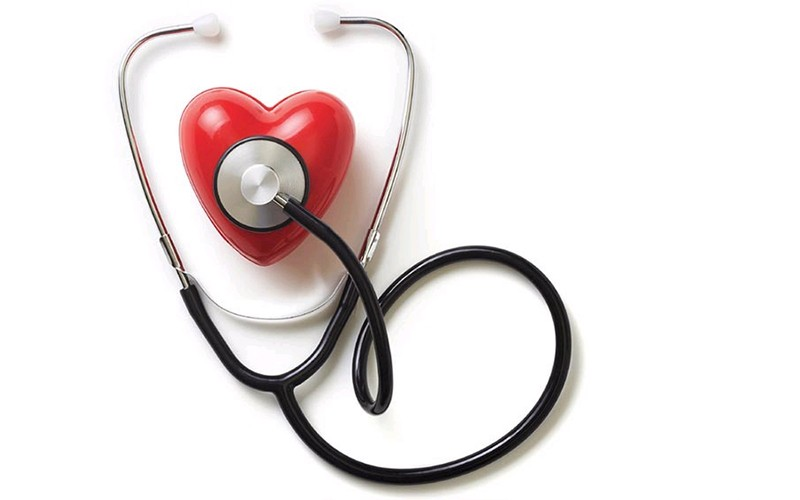



Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://github.com/joaodrj/Projetos_de_estudos_data_science/blob/main/datasets/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/joaodrj/Projetos_de_estudos_data_science/blob/main/datasets/heart-disease.names.txt).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://github.com/joaodrj/Projetos_de_estudos_data_science/blob/main/datasets/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [2]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil, index_col="ano", parse_dates=True)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [3]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [4]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [5]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

Primeiros vamos ver o tamanho do dataset, como podemos ver logo abaixo ele tem 303 entradas que são informações das pessoas e 14 colunas que são os atributos descritos no inicio.

In [6]:
#Verifica o tamanho do DataFrame
print("Linhas:",df.shape[0])
print("Colunas:",df.shape[1])

Linhas: 303
Colunas: 14


Verificando os tipos de variáveis vemos que são todas do tipo númerica

In [7]:
#Verifica os tipos das variáveis
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

###Informações Estatísticas do dataset
Com os dados que temos, podemos fazer análises estatísticas a fim de chegarmos a algumas conclusões referentes a doenças cardiovasculares. Com a função 'describe()', visualizamos informações como: a média de todos os valores de uma coluna (mean), a quantidade de valores válidos em cada coluna (count), o desvio-padrão dos valores de cada coluna (std), o valor máximo de cada coluna (max), o valor mínimo de cada coluna (min) e os quartis.

In [8]:
#Função usada para mostrar os dados estatisticos
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Analisando os resultados estatistícos acima podemos ver algumas informações como a média de idade que ficou em 54.43, a média dos valores de colesterol(chol) que ficou em 246.69 e também a média de pessoas que tiveram resultados positivos para alguma doenças cardiaca que ficou 0.45.

In [9]:
#Ver as 5 primeiras entradas do nosso dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Vamos ver a quantidade de pessoas detectadas com doenças cardiacas, Onde '0' indica que não há doença e '1' indica que foi diagnosticado com alguma doença cardica


In [10]:
df.value_counts('num')

num
0    164
1    139
dtype: int64

Vemos que há 164 pessoas sem e 139 diagnosticada com doenças cardiacas.

Vemos abaixo que não há nenhum valor ausente no nosso dataset, então podemos fazer as nossas analises com mais confiança.

In [11]:
#ver se há algum valor ausente no dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#Visualização de dados
Vendo graficamente poderemos ter uma melhor ideia do que os nossos dados estão nos dizendo, vamos dá uma olhada no gráfico que mostra o número de mortes entre o ano de 2004 a 2016

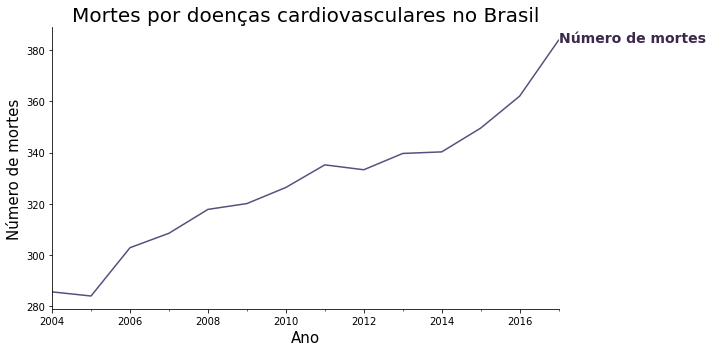

In [12]:
#Grafico de linha para df_brasil
fig, ax = plt.subplots(figsize=(10,5))
df_brasil.plot(kind='line', legend=False, ax=ax, color= '#574f7d')
ax.set_title('Mortes por doenças cardiovasculares no Brasil', fontsize=20)
ax.set_ylabel('Número de mortes', fontsize=15)
ax.set_xlabel('Ano', fontsize=15)

#remove as bordas a direita e no top
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#metodo para deixar a legenda logo no eixo do grafico
plt.text( '2017-',383,
          'Número de mortes',
          fontsize=14,
          weight='bold', 
          color='#3c2a4d')

plt.tight_layout()

Como podemos ver no gráfico acima tomando como base o ano de 2004 até 2017 mostra um aumento no número de mortes. No ano de 2004 tinhamos 285.466 mil mortes subindo em 2017 para 383.961 mil mortes. Isso corrobora a nossa hipótese inicial de que cada vez mais doenças cardiovasculares matam pessoas no Brasil.

In [13]:
#Mostrar quantidade de valores de homens e mulheres no nosso dataset
df.sex.value_counts()
#converter os valores de df.sex para inteiros
df.sex = df.sex.astype(int)
df.sex.value_counts()

1    206
0     97
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


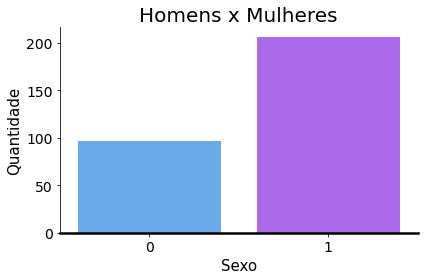

In [14]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(df.sex, ax=ax, palette='cool')

ax.set_title('Homens x Mulheres', fontsize=20)
ax.set_xlabel('Sexo', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15)

#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)

#remove as bordas a direita e no top
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)
plt.tight_layout();


No gráfico acima é possivel observar a quantidade de homens e mulheres presentes na nossa base de dados. Podemos observar que existem 206 homens e 97 mulheres.

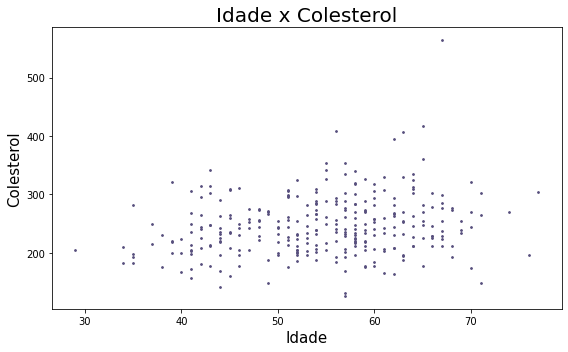

In [15]:
#Plotar gráfico de dispersão para as variáveis age e chol
fig, ax = plt.subplots()
df.plot.scatter(x='age', y='chol', ax=ax, s=3, figsize=(8,5), color='#574f7d')
ax.set_title('Idade x Colesterol', fontsize=20)
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Colesterol', fontsize=15)
plt.tight_layout()

No gráfico acima podemos ver uma correlação mais próxima entre pessoas de 40 a 70 anos entre as variáveis, faz sentido pois pessoas com essa idade tem tendencias de ter colesterol alto.

Segundo a  V Diretriz Brasileira de Dislipidemias e Prevenção da Aterosclerose, a qual define como valores desejáveis de colesterol total até 199 mg/dL, limítrofes entre 200 e 239 mg/dL e altos acima de 240 mg/dL podemos ver que os valores de referências que mais aparecem estão entre 200 e 300, que já é um ponto de atenção visto que a partir de 200 já é considerado limítrofes, temos também uma frequência alta de valores acima de 250 o que já é considerado alto.

No gráfico abaixo vemos a frequência que esses valores aparecem.

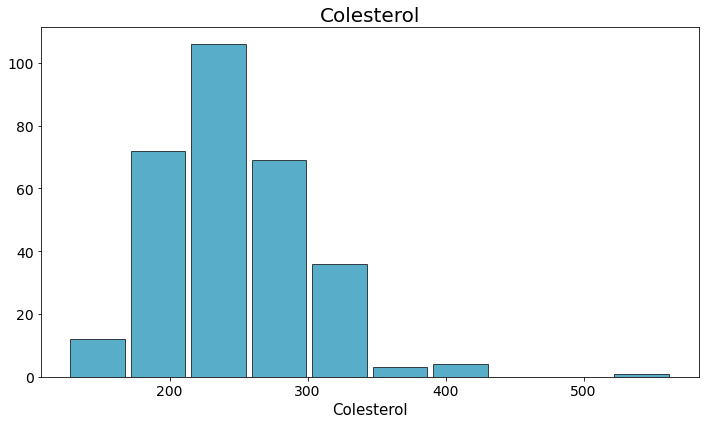

In [16]:
#plotar histograma do colesterol serico 'chol'
plt.figure(figsize=(10,6))
plt.title('Colesterol', fontsize=20)
plt.xlabel('Colesterol', fontsize=15)
plt.tick_params(labelsize=12)
#mudando tamanho dos labels dos ticks
plt.tick_params(labelsize=14)
plt.tight_layout();

plt.hist(df.chol, 10, rwidth=0.9, color='#118ab2', alpha=0.7, edgecolor='black')
plt.show()

Agora vamos ver resultados de eletrocardiografia de repouso, onde vemos a proporção de pessoas com alteração nos resultados do exame. O Eletrocardiograma (ECG) é um exame de triagem básico e, com ele, é possível atestar ou contestar a saúde do coração do paciente, bem como encontrar indícios de que ele pode ter ou não problemas cardíacos.

Como podemos ver no gráfico logo abaixo, no indice 0 encontra-se as pessoas com resultados normais, no indice 1 tem uma quantidade pequena que são pessoas que tiveram um pequena alteração chamada hipertrofia ventricular esquerda provável ou definitiva e no indice 2 vemos uma proporção muito grande de pessoas com alterações, chegando próximo da metade do número total de pessoas do nosso dataset, que é algo que requer atenção.

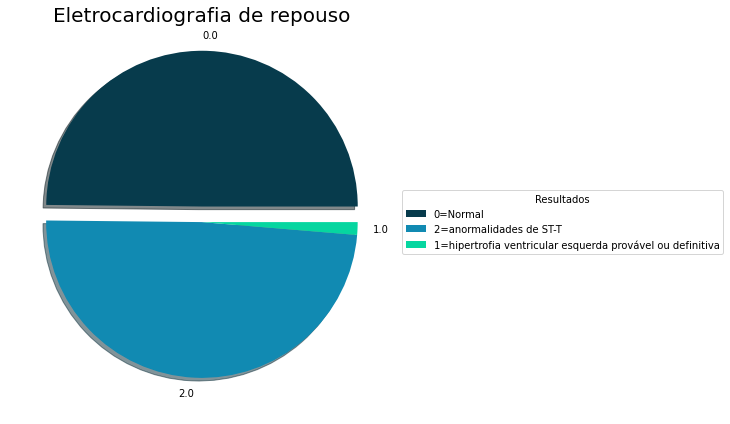

In [24]:
# extrair as ocorrências para um dicionário
restecg_classificacao = dict(df.restecg.value_counts())

# preparar dados para o pie chart
labels = restecg_classificacao.keys()
sizes = restecg_classificacao.values()
explode = (0.1, 0, 0)
cores = ['#073b4c','#118ab2','#06d6a0']
#plotando gráfico de pizza para restcg
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(sizes, labels=labels, explode=explode, shadow=True, colors=cores)
#criando legenda para o gráfico
legendas = ['0=Normal',
          '2=anormalidades de ST-T',
          '1=hipertrofia ventricular esquerda provável ou definitiva']
ax.legend(legendas, title='Resultados', loc='center left',bbox_to_anchor=(1,0,0.5,1))
ax.set_title("Eletrocardiografia de repouso", fontsize=20)
plt.tight_layout()

Para entender o quão próxima um atributo é do outro, vamos plotar um gráfico onde mostra um mapa de calor que mostra a correlação entre as variáveis, no gráfico abaixo temos uma linha cortando o gráfico na diagonal com valore 1 que significa que quanto mais proximo de um tem uma correlação maior e quanto mais próximo de 0 menor.

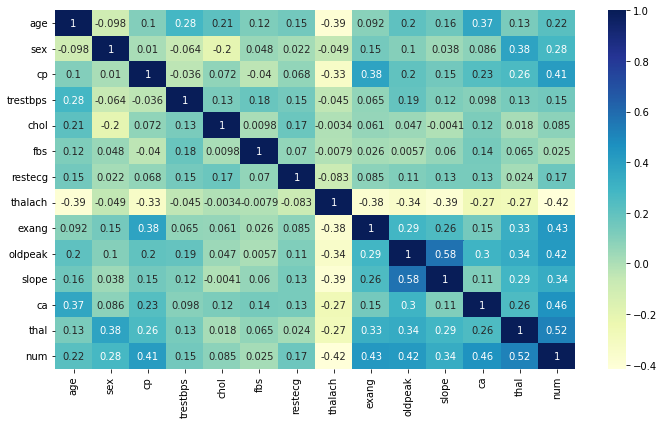

In [18]:
# heatmap (mapa de calor)
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(), ax=ax, annot=True, cmap='YlGnBu')
plt.tight_layout()

Fazendo uma analise simples vemos que o maior valor de correlação é 0.58 entre as variáveis 'slope' e 'oldpeak' nesse caso não dá para tirar tantos insights, porém se olharmos entre a variável 'thal'(Teste de Estresse de Tálio) vemos uma correlação de 0.52 em relação ao resultado final, o que faz sentido pois é um teste de imagem nuclear que mostra quão bem o sangue flui para o coração enquanto você está se exercitando ou em repouso e ajuda indentificar alguns problemas no coração, inclusive doenças cardíacas.

Outro ponto de atenção que devemos observar, mesmo que tenha tido uma correlação de 0.41 é a relação entre ao tipo da dor torácica(cp) e o quanto influência nos resultados finais.

#Conclusão

Fazendo uma analíse simples observa-se o quanto vem crescendo o número de mortes a cada ano no Brasil e o quanto é importante cuidar da nossa saúde.

Vemos também que:
* Pessoas com idades entre 40 e 70 anos tem tendências maiores de ter colesterol alto
* Número de pessoas com o colesterol acima do normal aparece mais de 100 vezes
* Número de pessoas com o colesterol alto também aparece mais de 100 vezes
* Quase metade das pessoas tem alterações nos exames de Eletrocardiograma (ECG)

